In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train , y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

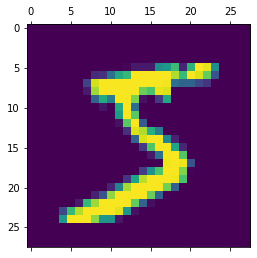

In [7]:
plt.matshow(x_train[0])

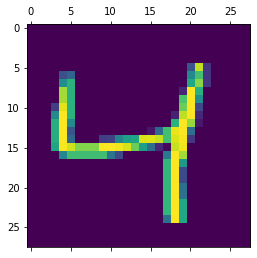

In [8]:
plt.matshow(x_train[2])

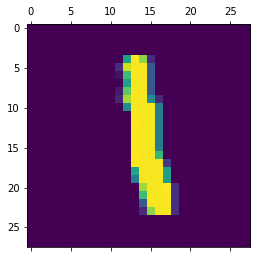

In [9]:
plt.matshow(x_train[6])

In [10]:
y_train[6]

1

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
#do not foreget to scale the values -> scaling puts the value between 0 to 1
#scaling improves the accuracy
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train_flattned = x_train.reshape(len(x_train), 28*28)

In [15]:
x_train_flattned.shape

(60000, 784)

In [16]:
x_test_flattned = x_test.reshape(len(x_test), 28*28)

In [17]:
x_test_flattned.shape

(10000, 784)

In [29]:
#defining the neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattned, y_train, epochs=5, callbacks=tb_callback)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7839 - accuracy: 0.8130
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4578 - accuracy: 0.8799
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4042 - accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8970
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3606 - accuracy: 0.9007


In [19]:
model.evaluate(x_test_flattned, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9257


[0.26872017979621887, 0.9257000088691711]

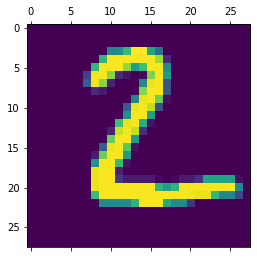

In [20]:
plt.matshow(x_test[1])

In [21]:
#Prediction
y_pred = model.predict(x_test_flattned)
y_pred[1]

313/313 [==============================] - 1s 2ms/step


array([4.7772637e-01, 1.2414194e-02, 9.9913418e-01, 3.5029083e-01,
       6.9319867e-10, 9.1051477e-01, 9.2958081e-01, 2.3367035e-12,
       1.8469241e-01, 2.3719029e-09], dtype=float32)

In [22]:
np.argmax(y_pred[1])

2

In [23]:
#correct prediction!!